<a href="https://colab.research.google.com/github/FaezeM/datasets_playground/blob/main/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the Keras 2.x main module relying on tensorflow 2.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.17.1
Using keras version 3.5.0


In [2]:
# Plot graphs

import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot dataset points in 2D
def plot_dataset_(X, y, axes, x1_index=0, x2_index=1, labels=[]):
    # Iterate over each unique class label in y, assigning it a unique marker style
    for item, style in zip(set(y), ["bs", "g^", "yo", "cv", "m<", "r<"]):
        # Special marker style for misclassified points
        if item == -1: # style for wrong class
            style = "rx"
        # Plot each class with its style
        plt.plot(X[:, 0][y==item], X[:, 1][y==item], style)
    # Set plot axes if specified
    if axes != []:
        plt.axis(axes)
    # Add grid lines for readability
    plt.grid(True, which='both')
    # Set x and y axis labels if specified, otherwise default
    if labels != []:
        plt.xlabel(labels[x1_index], fontsize=12)
        plt.ylabel(labels[x2_index], fontsize=12)
    else:
        plt.xlabel(r"$x_1$", fontsize=12)
        plt.ylabel(r"$x_2$", fontsize=12, rotation=0)
    return

# Wrapper function to plot dataset with title
def plot_dataset(X, y, title, x1_index=0, x2_index=1, labels=[]):
    # Call plot_dataset_ with empty axes (fit plot to data)
    plot_dataset_(X, y, [], x1_index=x1_index, x2_index=x2_index, labels=labels)
    plt.title(title)  # Set the plot title
    plt.show()
    return

# Function to plot classifier decision boundaries
def plot_predictions(clf, axes, confidence=True, encoder=None):
    # Generate a grid of points across specified axes range
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_ = np.c_[x0.ravel(), x1.ravel()] # Flatten grid for predictions
    # Predict labels for each grid point
    if encoder is None:
      y_pred = clf.predict(X_).reshape(x0.shape)
    else:
      y_pred = clf.predict(X_)#.reshape(x0.shape)
      #y_pred = encoder.inverse_transform(np.around(y_pred)).reshape(x0.shape)#.flatten()
      # Plot decision boundaries using filled contours
      y_pred = encoder.inverse_transform(y_pred).reshape(x0.shape)#.flatten()
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plot confidence scores for samples
    # Plot confidence levels as additional contours, if enabled
    if confidence:
        y_decision = clf.decision_function(X_).reshape(x0.shape)
        plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    return

# Main function to display classification results with predictions
def plot_classification_results(X, y, clf=None, predicted_y=[], axes=[], confidence=False, encoder=None, title=""):
    # Automatically calculate axis limits if not provided
    if axes == []:
        for i in [0,1]:
            min_x = min(X[:,i])
            max_x = max(X[:,i])
            delta_x = (max_x-min_x)/20
            axes += [min_x-delta_x, max_x+delta_x]
    # Plot decision boundaries if classifier is provided
    if clf != None:
        plot_predictions(clf, axes, confidence=confidence, encoder=encoder)
    # Plot dataset with misclassified points highlighted if predicted_y is given
    #if predicted_y!= []:
    if len(predicted_y)!= 0:
        # Identify misclassified points and set their label to -1
        #res_y = np.array([el1 if (el1==el2) else -1 for el1,el2 in zip(y, predicted_y)])
        res_y = (y == predicted_y)
        res_y = np.array([el1 if el2 else -1 for el1,el2 in zip(y, res_y)])
        plot_dataset_(X, res_y, axes)
    else:
        plot_dataset_(X, y, axes)
    plt.title(title) # Set the plot title
    plt.show()
    return

# Function to plot a confusion matrix
def plot_confusion_matrix(real_labels, predicted_labels, normalize=False, labels=[]):
    # Calculate the confusion matrix for real and predicted labels
    c_mat = confusion_matrix(real_labels, predicted_labels)

    # Normalize the confusion matrix, if specified
    cbar_label = "Number of samples"
    if normalize:
        c_mat = c_mat/c_mat.sum(axis=1)
        cbar_label = "Ratio of samples"

    # Plot the confusion matrix as a heatmap
    sns.heatmap(c_mat, annot=True, cmap="YlGnBu", vmin=0, vmax=1, cbar_kws={'label': cbar_label}, xticklabels=labels, yticklabels=labels)
    plt.yticks(rotation=0) # Rotate y-axis labels for readability
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    return

In [4]:
# loading wine
from sklearn.datasets import load_wine

wine_data = load_wine()

In [5]:
# this is the data to train
wine_data['data'][0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [6]:
# this is true label of the data
wine_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
# attributes each example has
wine_data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
# the class of wines
wine_data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
from sklearn.model_selection import train_test_split

# split
train_data, test_data, train_labels, test_labels = train_test_split(wine_data['data'], wine_data['target'], test_size=0.25, random_state=0)

In [11]:
# [0] = number of training examples
# [1] = number of features = the input
train_data.shape

(133, 13)

In [12]:
train_labels

array([0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2,
       0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2,
       2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       2])

In [13]:
from sklearn.preprocessing import OneHotEncoder

my_encoder = OneHotEncoder()

# Fit the encoder to the training labels and then transform them
enc_train_labels = my_encoder.fit_transform(train_labels.reshape(-1, 1)).todense()

# Transform the test labels using the already-fitted encoder
enc_test_labels = my_encoder.transform(test_labels.reshape(-1, 1)).todense()

In [14]:
enc_train_labels
# [x][0] = 1 -> 0
# [x][1] = 1 -> 1
# [x][2] = 1 -> 2

matrix([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1

In [16]:
# Plot the metric curves on train and validation sets

def plot_history(history, metric, val_prefix="val_"):

  # Convert the metric name to title case for labeling
  label = metric.capitalize()

  # Plot the metric values for the training set
  plt.plot(history.history[metric])

  # Plot the metric values for the validation set
  plt.plot(history.history[val_prefix+metric])

  # Set the plot title to display the metric (e.g., 'Model Accuracy' or 'Model Loss')
  plt.title('Model ' + label)

  # Label the y-axis with the metric name
  plt.ylabel(label)

  # Label the x-axis with 'Epoch' since the values are plotted across epochs
  plt.xlabel('Epoch')

  # Set legend location based on the metric type (accuracy or other)
  legend_loc = 'lower right' if metric == 'accuracy' else 'upper right'

  # Add legend to distinguish training and validation curves
  plt.legend(['train', 'test'], loc=legend_loc)

  # Display the plot
  plt.show()
  return

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3008 - loss: 49.5510 - val_accuracy: 0.1778 - val_loss: 12.6933
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2953 - loss: 7.7099 - val_accuracy: 0.3556 - val_loss: 7.2003
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3609 - loss: 10.1107 - val_accuracy: 0.4667 - val_loss: 5.9294
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4256 - loss: 8.4384 - val_accuracy: 0.5556 - val_loss: 3.6766
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5277 - loss: 4.2318 - val_accuracy: 0.2667 - val_loss: 1.5736
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3517 - loss: 2.6183 - val_accuracy: 0.3778 - val_loss: 2.5271
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4080 - loss: 2.6626 - val_accuracy: 0.5111 - val_loss: 1.7950
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4280 - loss: 2.1276 - val_accuracy: 0.4889 - val_loss: 1.864

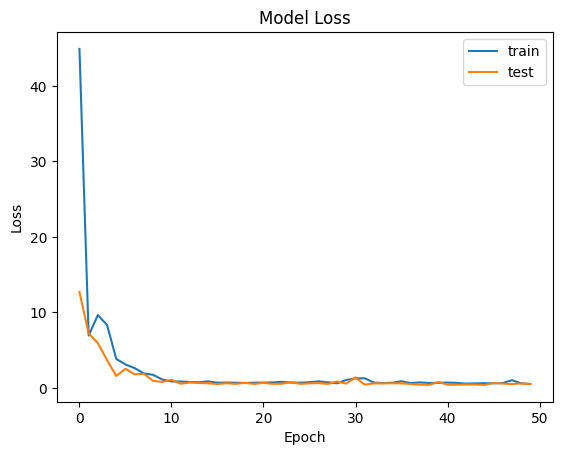

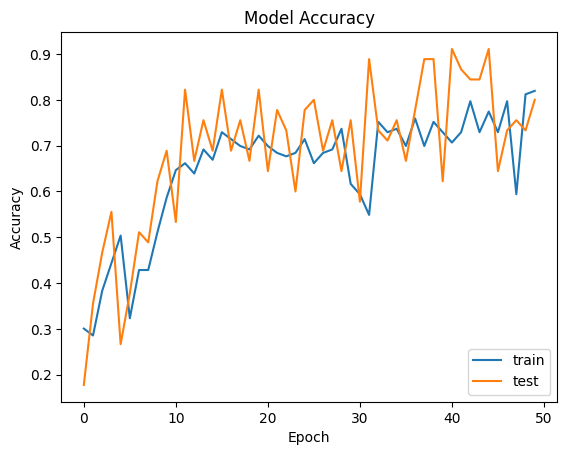

In [18]:
# 13 inputs -> 2 layers -> 3 outputs
def get_model():
  model = keras.Sequential()

  model.add(keras.layers.Input(shape=(13,))) # because we have 3 classes = data_train.shape[1]
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(32, activation='relu'))
  model.add(keras.layers.Dense(3, activation='softmax')) # 3 output

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # for multiclass
  return model

model = get_model()
history = model.fit(train_data, enc_train_labels, epochs=50, batch_size=32, shuffle=True, validation_data=(test_data, enc_test_labels))#, verbose=0)
# chatgpt told me batch_size = 16 but 32 is better
plot_history(history, 'loss')
plot_history(history, 'accuracy')

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,227 (36.05 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,152 (24.04 KB)

In [21]:
test_data.shape

(45, 13)

In [22]:
# Predictions
y_pred = np.argmax(model.predict(test_data), axis=1)
y_true = np.argmax(test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [23]:
# use trained classifcation model to predict classes on test set
predicted = model.predict(test_data)

# come back from one hot encoding to classes
predicted = my_encoder.inverse_transform(predicted).flatten()
predicted
# plot trained classifer
plot_classification_results(test_data, test_labels, clf=model, predicted_y=predicted, axes=[], encoder=my_encoder, title="Classification on test data")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


InvalidArgumentError: Graph execution error:

Detected at node sequential_2_1/dense_6_1/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-23-7beeaa9e672b>", line 8, in <cell line: 8>

  File "<ipython-input-2-b7cb4f191b86>", line 74, in plot_classification_results

  File "<ipython-input-2-b7cb4f191b86>", line 51, in plot_predictions

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 512, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 212, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 560, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 144, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/numpy.py", line 3445, in matmul

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/numpy.py", line 477, in matmul

Matrix size-incompatible: In[0]: [32,2], In[1]: [13,64]
	 [[{{node sequential_2_1/dense_6_1/MatMul}}]] [Op:__inference_one_step_on_data_distributed_15662]